In [1]:
#!pip install seaborn numpy matplotlib phonopy phono3py pyyaml
import numpy as np
import seaborn as sns
import pandas as pd
#import phono3py as pn
import yaml as yaml

import matplotlib.pylab as plt
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.lines import Line2D

rcParams.update({'figure.autolayout': True})
sns.set_style("whitegrid", rc={"axes.edgecolor": "k", "axes.linewidth":2.})
sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

sns.set_context("notebook",rc={"grid.linewidth": 0.1,
                            "font.family":"Helvetica", "axes.labelsize":20.,"xtick.labelsize":18.,
                            "ytick.labelsize":18., "legend.fontsize":12.,"title.labelsize":14.}) # https://seaborn.pydata.org/tutorial/aesthetics.html

colors = sns.color_palette("colorblind", 8) #https://seaborn.pydata.org/tutorial/color_palettes.html

display(colors)
# color key: main element = 'k', additional elements = colors[0,1,2,...], fermi = colors[6], kpoints = colors[7]
# have dft='k' 'solid'; gfn1=colors[10] 'dotted'; gfn2=colors[11] 'dashed'

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

new phono3py post processing

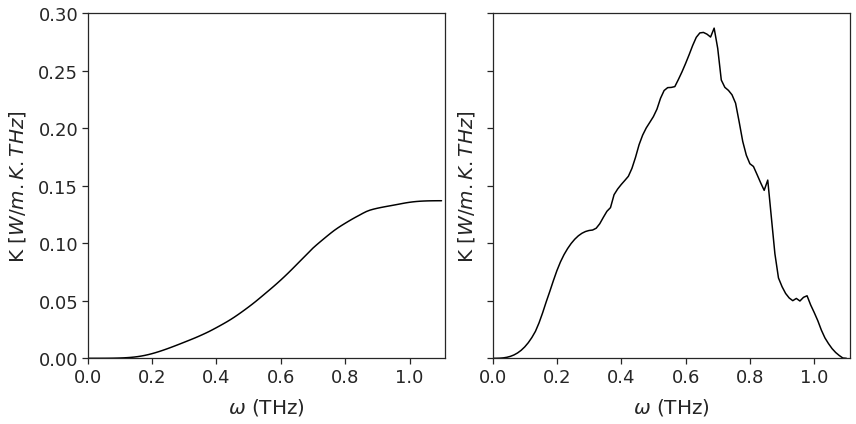

In [34]:
# Thermal Conductivity 
#tc = np.array(np.loadtxt('/gscratch/ajense28/Phono3py/vasp-Xe/kaccum.dat'))
tc = np.array(np.loadtxt('./plot-src/Xe_VASP_phono3pyTC.dat'))
fig, axs = plt.subplots(nrows=1, ncols=2,sharey=True,figsize=(12,6),gridspec_kw={'width_ratios': [1, 1]})
#print(tc)
plt.subplot(121)
plt.plot(tc[:,0],(tc[:,1]+tc[:,2]+tc[:,3])/3, color='black')
plt.xlabel(r'$\omega$ (THz)',  labelpad = 10) 
plt.ylabel(r"Κ $[W/m.K.THz]$",  labelpad = 10)
plt.xlim(tc[0,0],tc[-1,0]+0.01)
plt.ylim(0,0.3)
plt.subplot(122) # not sure how to make less wide
plt.plot(tc[:,0],(tc[:,7]+tc[:,8]+tc[:,9])/3, color='black')
plt.xlabel(r'$\omega$ (THz)',  labelpad = 10) 
plt.ylabel(r"Κ $[W/m.K.THz]$",  labelpad = 10)
plt.xlim(tc[0,0],tc[-1,0]+0.01)
plt.ylim(0,0.3)
#plt.legend()
#plt.title('Xenon Thermal Conductivity (Phono3py)')
plt.savefig('./plot-fig/Xe_VASP_phono3pyTC.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() # 

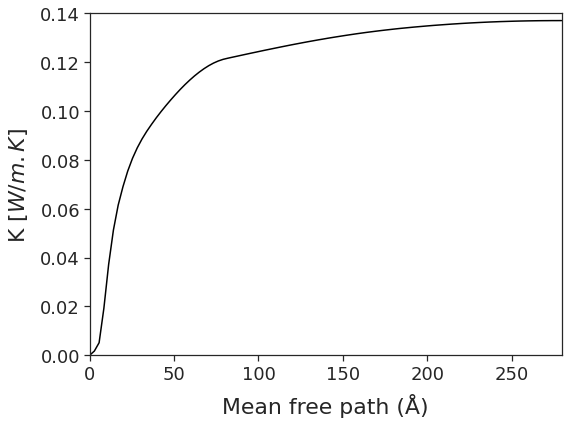

In [31]:
# Mean Free Path
mfp = np.array(np.loadtxt('./plot-src/Xe_VASP_phono3pyMFP.dat'))
fig = plt.figure(figsize=(8,6))
plt.plot(mfp[:,0],mfp[:,1], color='black')
plt.xlabel(r'Mean free path (Å)',  labelpad = 10,fontsize=22) 
plt.ylabel(r"Κ $[W/m.K]$",  labelpad = 10,fontsize=22)
plt.xlim(mfp[0,0],mfp[-1,0]+0.01)
plt.ylim(0,0.14)
#plt.legend(fontsize=14)
#plt.title('Xenon Mean Free Path (Phono3py)', fontsize=14)
plt.savefig('./plot-fig/Xe_VASP_phono3pyMFP.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() # 

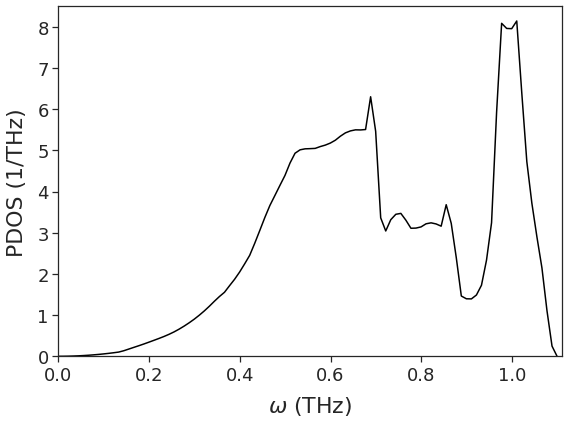

In [33]:
# phono3py TDOS
tdos = np.array(np.loadtxt('./plot-src/Xe_VASP_phono3pyTDOS.dat'))
fig = plt.figure(figsize=(8,6))
plt.plot(tdos[:,0],tdos[:,2], color='black')
plt.xlabel(r'$\omega$ (THz)',  labelpad = 10,fontsize=22) 
plt.ylabel(r"PDOS (1/THz)",  labelpad = 10,fontsize=22)
plt.xlim(tdos[0,0],tdos[-1,0]+0.01)
plt.ylim(0,8.5)
#plt.legend(fontsize=14)
#plt.title('Xenon Total Density of States (Phono3py)', fontsize=14)
plt.savefig('./plot-fig/Xe_VASP_phono3pyTDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() # 

Composite TDOS+BS (VASP)

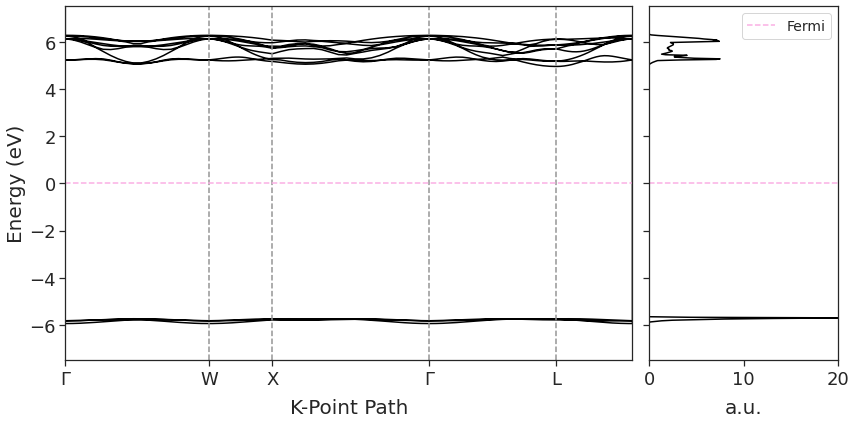

In [2]:
# band structure and density of states
fig, axs = plt.subplots(nrows=1, ncols=2,sharey=True,figsize=(12,6),gridspec_kw={'width_ratios': [3, 1]})
#fig.suptitle('Xenon VASP Results',fontsize=14)
plt.subplot(121)
dos = np.array(np.loadtxt('./plot-src/Xe_VASP_TDOS.dat'))
bands = np.array(np.loadtxt('./plot-src/Xe_VASP_BAND.dat'))
fermi = -6.327715

kpts = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]]
kpath = [bands[0,0],bands[19,0],bands[39,0],bands[59,0],bands[79,0],bands[99,0]]
plt.plot(bands[:,0], bands[:,1]-(fermi), color='black')
plt.xticks(kpath,['\u0393','W','X','\u0393','L','X'])
plt.yticks(fontsize=18)
plt.vlines(kpath[1:-1],-7.5,7.5,color=colors[7],linestyle='dashed')
plt.hlines(0,0,6.3279,color=colors[6],linestyle='dashed',label='fermi')
plt.xlim(0,6.3278)
plt.ylim(-7.5,7.5)
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
#plt.title('Band Structure')

plt.subplot(122) # not sure how to make less wide
plt.plot(dos[:,1]/5, dos[:,0]-(fermi), color='black')
plt.hlines(0,0,20,color=colors[6],linestyle='dashed',label='Fermi')
plt.xlabel('a.u.',  labelpad = 10)
plt.ylim(-7.5,7.5)
plt.xlim(0,20)
#plt.title('Density of States')
plt.legend(fontsize=14)

plt.savefig('./plot-fig/Xe_VASP_Composite.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

Composite TDOS+BS (GFN)

Composite phonon TDOS+BS (VASP)

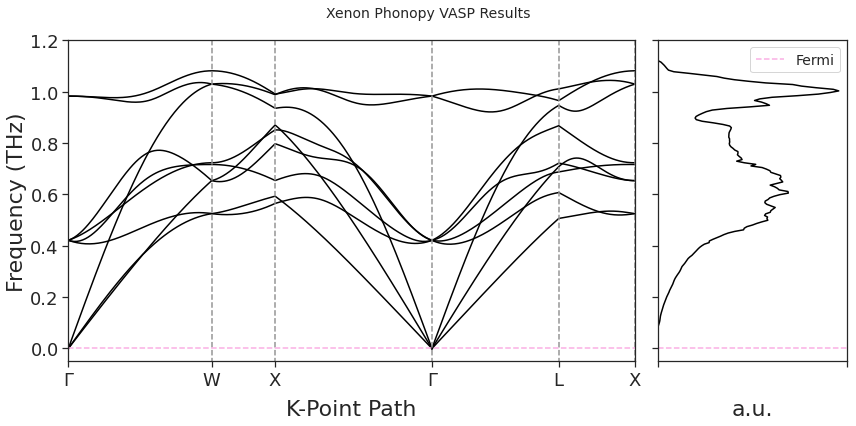

In [3]:
# band structure and density of states
fig, axs = plt.subplots(nrows=1, ncols=2,sharey=True,figsize=(12,6),gridspec_kw={'width_ratios': [3, 1]})
fig.suptitle('Xenon Phonopy VASP Results',fontsize=14)
plt.subplot(121)
dos = np.array(np.loadtxt('./plot-src/Xe_VASP_phononTDOS.dat'))
bands = np.array(np.loadtxt('./plot-src/Xe_VASP_phononBAND.dat'))
fermi = 0

# Γ—X—U|K—Γ—L—W—X 
kpath = [bands[0,0],bands[100,0],bands[201,0],bands[302,0],bands[403,0],bands[504,0]]
plt.plot(bands[:,0], bands[:,1:], color='k')
plt.xticks(kpath,['\u0393','W','X','\u0393','L','X'],fontsize=18)
plt.yticks(fontsize=18)
plt.vlines(kpath,-0.5,17.5,color=colors[7],linestyle='dashed')
plt.hlines(0,bands[0,0],bands[504,0],color=colors[6],linestyle='dashed',label='Fermi')
plt.xlim(0,bands[504,0])
plt.ylim(-0.05,1.2)
plt.xlabel('K-Point Path',  labelpad = 10,fontsize=22)
plt.ylabel('Frequency (THz)', labelpad = 3,fontsize=22)
#plt.title('Band Structure', fontsize=14)

plt.subplot(122) # not sure how to make less wide
plt.plot((dos[:,1]), dos[:,0], color='black')
plt.hlines(0,0,25,color=colors[6],linestyle='dashed',label='Fermi')
plt.xticks([0,25],[' ',' '])
plt.xlabel('a.u.',  labelpad = 10,fontsize=22)
plt.xlim(0,25)
plt.ylim(-0.05,1.2)
#plt.title('Density of States', fontsize=14)
plt.legend(fontsize=14)

plt.savefig('./plot-fig/Xe_VASP_phononComposite.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() #

Composite phonon TDOS+BS (DFTB)

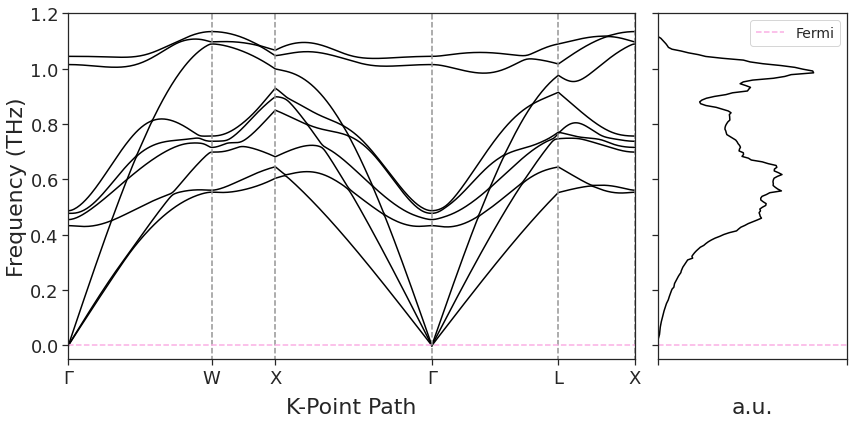

In [4]:
# band structure and density of states
fig, axs = plt.subplots(nrows=1, ncols=2,sharey=True,figsize=(12,6),gridspec_kw={'width_ratios': [3, 1]})
#fig.suptitle('Xenon Phonopy DFTB Results',fontsize=14)
plt.subplot(121)
dos = np.array(np.loadtxt('./plot-src/Xe_DFTB_phononTDOS.dat'))
bands = np.array(np.loadtxt('./plot-src/Xe_DFTB_phononBAND.dat'))
fermi = 0

# Γ—X—U|K—Γ—L—W—X 
kpath = [bands[0,0],bands[100,0],bands[201,0],bands[302,0],bands[403,0],bands[504,0]]
plt.plot(bands[:,0], bands[:,1:], color='k')
plt.xticks(kpath,['\u0393','W','X','\u0393','L','X'],fontsize=18)
plt.yticks(fontsize=18)
plt.vlines(kpath,-0.5,17.5,color=colors[7],linestyle='dashed')
plt.hlines(0,bands[0,0],bands[504,0],color=colors[6],linestyle='dashed',label='Fermi')
plt.xlim(0,bands[504,0])
plt.ylim(-0.05,1.2)
plt.xlabel('K-Point Path',  labelpad = 10,fontsize=22)
plt.ylabel('Frequency (THz)', labelpad = 3,fontsize=22)
#plt.title('Band Structure', fontsize=14)

plt.subplot(122) # not sure how to make less wide
plt.plot(dos[:,1], dos[:,0]-.08, color='black')
plt.hlines(0,0,25,color=colors[6],linestyle='dashed',label='Fermi')
plt.xticks([0,25],[' ',' '])
plt.xlabel('a.u.',  labelpad = 10,fontsize=22)
plt.xlim(0,25)
plt.ylim(-0.05,1.2)
#plt.title('Density of States', fontsize=14)
plt.legend(fontsize=14)

plt.savefig('./plot-fig/Xe_DFTB_phononComposite.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() #

Total Density Of States (VASP)

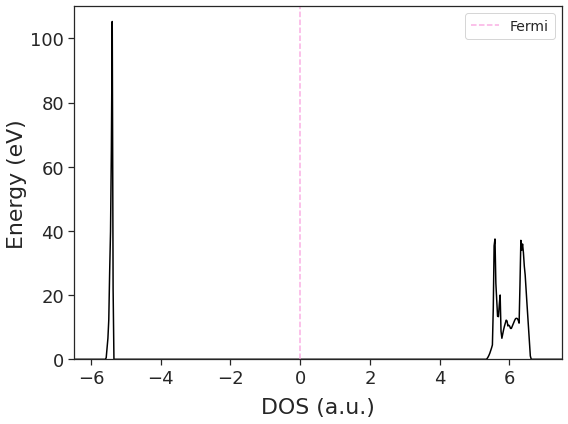

In [5]:
# TDOS
dos = np.array(np.loadtxt('./plot-src/Xe_VASP_TDOS.dat'))
fig = plt.figure(figsize=(8,6))
fermi = (-12.00483 - (-1.27283))/2 + -1.27283 #-6.381170  #set at midpoint between valence and conduction

plt.plot(dos[:,0]-fermi, dos[:,1], color='black')
plt.vlines(0,0,110,color=colors[6],linestyle='dashed',label='Fermi')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(-6.5,7.5)
plt.ylim(0,110)
plt.legend(fontsize=14)
plt.xlabel('DOS (a.u.)',  labelpad = 10,fontsize=22)
plt.ylabel('Energy (eV)', labelpad = 3,fontsize=22)
#plt.title('Xenon Total Density of States (DFT)', fontsize=14)
plt.savefig('./plot-fig/Xe_VASP_TDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() # 

Partial Density Of States (VASP)

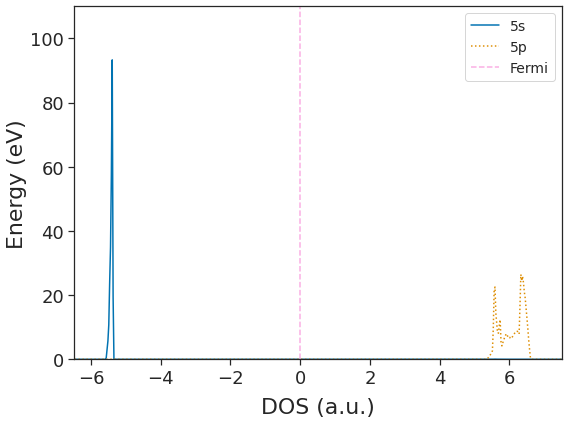

In [6]:
# PDOS
pdos = np.array(np.loadtxt('./plot-src/Xe_VASP_PDOS.dat'))
fermi = (-12.00483 - (-1.27283))/2 + -1.27283 #-6.381170 
fig = plt.figure(figsize=(8,6))
   #Energy           s          py          pz          px         dxy         dyz         dz2         dxz         dx2       tot  
#plt.plot(dos[:,0]-fermi, dos[:,1], color='k',lw=3, label='Xe DOS DFT')
#plt.plot(pdos[:,0]-fermi, pdos[:,10], color='k', label='Xe Atom TOT') # about 2/3 of system tot, why?
plt.plot(pdos[:,0]-fermi, pdos[:,1], color=colors[0], label='5s')
plt.plot(pdos[:,0]-fermi, pdos[:,2]+pdos[:,3]+pdos[:,4], color=colors[1],linestyle='dotted', label='5p')
#plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,5]+PDOSDFT[:,6]+PDOSDFT[:,7]+PDOSDFT[:,8]+PDOSDFT[:,9], color='b',lw=2, label='d') # 0
plt.vlines(0,0,110,color=colors[6],linestyle='dashed',label='Fermi')
plt.xlabel('DOS (a.u.)',  labelpad = 10,fontsize=22)
plt.ylabel('Energy (eV)', labelpad = 3,fontsize=22)
plt.xlim(-6.5,7.5)
plt.ylim(0,110)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
#plt.title('Xenon Partial Density of States (DFT)', fontsize=14)
plt.savefig('./plot-fig/Xe_PDOS_DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()#plt.close() # 

Band Structure (VASP)

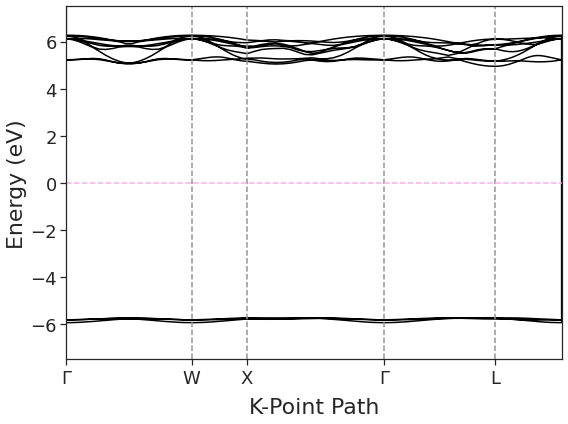

In [7]:
# band structure
bands = np.array(np.loadtxt('./plot-src/Xe_VASP_BAND.dat'))
fermi = -6.327715
fig = plt.figure(figsize=(8,6))
# GWXGLX
kpts = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]]
kpath = [bands[0,0],bands[19,0],bands[39,0],bands[59,0],bands[79,0],bands[99,0]]
plt.plot(bands[:,0], bands[:,1]-(fermi), color='black')
plt.xticks(kpath,['\u0393','W','X','\u0393','L','X'],fontsize=18)
plt.yticks(fontsize=18)
plt.vlines(kpath[1:-1],-7.5,7.5,color=colors[7],linestyle='dashed')
plt.hlines(0,0,6.3279,color=colors[6],linestyle='dashed',label='fermi')
plt.xlim(0,6.3278)
plt.ylim(-7.5,7.5)
plt.xlabel('K-Point Path', labelpad = 10,fontsize=22)
plt.ylabel('Energy (eV)', labelpad = 3,fontsize=22)
#plt.title('Xenon Band Structure (VASP)', fontsize=14)
plt.savefig('./plot-fig/Xe_VASP_BAND.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()#plt.close() # 

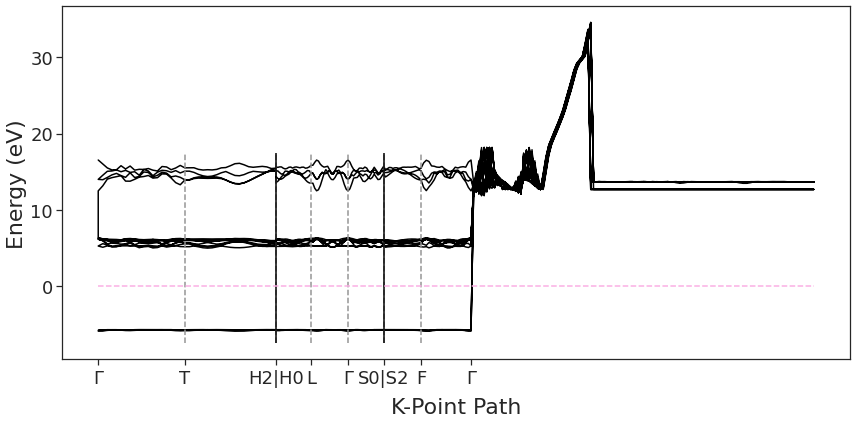

In [8]:
# SeeK-PATH KPTS R-3m Γ—T—H2|H0—L—Γ—S0|S2—F—Γ 
bands = np.array(np.loadtxt('../Xe/DFT/4-BS/KPTS-Rm-3/BAND.dat'))
fermi = -6.3424
fig = plt.figure(figsize=(12,6))
kpts = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]]
kpath = [bands[0,0],bands[19,0],bands[39,0],bands[59,0],bands[79,0],bands[99,0],bands[119,0],bands[139,0]]
plt.plot(bands[:,0], bands[:,1]-(fermi), color='black')
plt.xticks(kpath,['\u0393','T','H2|H0','L','\u0393','S0|S2','F','\u0393'],fontsize=18)
plt.yticks(fontsize=18)
plt.vlines(kpath[1:-1],-7.5,17.5,color=colors[7],linestyle='dashed')
plt.vlines([kpath[2],kpath[5]],-7.5,17.5,color='k')
plt.hlines(0,0,21.91164,color=colors[6],linestyle='dashed',label='fermi')
#plt.xlim(bands[0,0],bands[139,0])
#plt.ylim(-7.5,17.5)
plt.xlabel('K-Point Path', labelpad = 10,fontsize=22)
plt.ylabel('Energy (eV)', labelpad = 3,fontsize=22)
#plt.title('Xenon R-3m KPATH Band Structure (VASP)', fontsize=14)
plt.savefig('./plot-fig/Xe_VASP_BAND_SeeK-PATH.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()#plt.close() # 

Superimposed Phonon Band Structure (VASP and DFTB)

In [9]:
# superimposed phonon Band Structure plots
# to plot superimposed, normalize one axis, then plot the 'twin' version of the other axis, then hide the extra axis
scale = 1
fig, ax1 = plt.subplots(figsize=(8,6))
VASP_bands = np.array(np.loadtxt('./plot-src/Xe_VASP_phononBAND.dat'))
DFTB_bands = np.array(np.loadtxt('./plot-src/Xe_DFTB_phononBAND.dat'))

kpath = [VASP_bands[0,0],VASP_bands[100,0],VASP_bands[201,0],VASP_bands[302,0],VASP_bands[403,0],VASP_bands[504,0]]/VASP_bands[504,0]
ax1.set_xlabel('K-Point Path',  labelpad = 10,fontsize=12)
ax1.set_ylabel('Frequency (THz)', labelpad = 3,fontsize=12)
#ax1.vlines(kpath[:],0,17.5,color=colors[7],linestyle='dashed')
ax1.plot(VASP_bands[0,0]/VASP_bands[504,0], VASP_bands[0,1], color='black',label='VASP')
ax1.plot(VASP_bands[:,0]/VASP_bands[504,0], VASP_bands[:,1:-1], color='black')
plt.legend(loc=2)
#plt.ylim(-.05,1.25)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same y-axis
kpath = [DFTB_bands[0,0],DFTB_bands[100,0],DFTB_bands[201,0],DFTB_bands[302,0],DFTB_bands[403,0],DFTB_bands[504,0]]/DFTB_bands[504,0]
plt.xticks(kpath,['\u0393','W','X','\u0393','L','X'])
ax2.plot(DFTB_bands[0,0]/DFTB_bands[504,0], DFTB_bands[0,1], color=colors[0],linestyle='dashdot', label='DFTB')
ax2.plot(DFTB_bands[:,0]/DFTB_bands[504,0], DFTB_bands[:,1:-1], color=colors[0],linestyle='dashdot')
ax2.tick_params(axis='x')
#ax2.get_xaxis().set_visible(False) # hide the extra axes
plt.legend(loc=1)
#plt.ylim(-.05,1.25)

plt.hlines(0,VASP_bands[0,0]/VASP_bands[504,0],VASP_bands[504,0]/VASP_bands[504,0],color=colors[6],linestyle='dashed',label='Fermi')
plt.xlim(0,1)
plt.title('Xe Phonon Superimposed Band Structure Plot', fontsize=14)
plt.savefig('./plot-fig/Xe_Superimposed_phononBAND.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.close() #plt.show()

Total Density of States (GFN)

In [10]:
# GFN xTB TDOS
gfn1tdos = np.array(np.loadtxt('./plot-src/Xe_GFN1_TDOS.dat'))
gfn1fermi =  (-12.6 - (-21.65))/2 + -21.65 # midway between peaks -17.125
gfn2tdos = np.array(np.loadtxt('./plot-src/Xe_GFN2_TDOS.dat'))
gfn2fermi =  (-1.1990000000E+01 - (-1.8680000000E+01))/2 + (-1.8680000000E+01)# midway between peaks

fig = plt.figure(figsize=(8,6))
plt.plot(gfn1tdos[:,0]-gfn1fermi, gfn1tdos[:,1], color='g', label='GFN1')
plt.plot(gfn2tdos[:,0]-gfn2fermi, gfn2tdos[:,1], color='purple',linestyle='dotted', label='GFN2')
plt.vlines(0,0,21.5,color=colors[6],linestyle='dashed', label='Fermi')

plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.ylim(0,21.5)
plt.xlim(-6.5,7.5)
plt.legend()
plt.xlabel('DOS (a.u.)',  labelpad = 10,fontsize=12)
plt.ylabel('Energy (eV)', labelpad = 3,fontsize=12)
plt.title('Xenon Total Density of States (GFN-xTB)', fontsize=14)
plt.savefig('./plot-fig/Xe_GFN_TDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.close() #plt.show()

Band Structure (GFN) 

In [11]:
# band structure
# GFN1
KPOINTS = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]] # copied from KPOINTS

BANDS_GFN1 = np.array(np.loadtxt("./Xe/GFN1/4-BS/bands_tot.dat")) 
KPATH_GFN1 = k_path_dft(KPOINTS, "./Xe/GFN1/4-BS/POSCAR",len(KPOINTS)) # update this to be my poscar
fermiGFN1 =  (-12.6 - (-21.65))/2 + -21.65 # midway between peaks
# bilbalo chrystallogrphic server, symmetry, kvec, choose sym for struct, #227 Fd-3m, kvectors ##############3
#print('shape', np.shape(Bands_Xe_DFT))
#print(KPATH_Xe_DFT)

fig1 = plt.figure(figsize=(12,8))
#GFN1
plt.plot(BANDS_GFN1[:,0], BANDS_GFN1[:,1:-1]-fermiGFN1, color='green', lw=2) # use first column of reformatted bands to be x vals 

BANDS_GFN2 = np.array(np.loadtxt("./Xe/GFN2/4-BS/bands_tot.dat"))
KPATH_GFN2 = k_path_dft(KPOINTS, "./Xe/GFN2/4-BS/POSCAR",len(KPOINTS)) # update this to be my poscar
fermiGFN2 =  (-1.1990000000E+01 - (-1.8680000000E+01))/2 + (-1.8680000000E+01)# midway between peaks

#GFN2
plt.plot(BANDS_GFN2[:,0], BANDS_GFN2[:,1:-1]-fermiGFN2, color='purple',linestyle='dotted', lw=2) # use first column of reformatted bands to be x vals 
plt.hlines(0,BANDS_GFN2[0,0],BANDS_GFN2[-1,0],color=colors[6],linestyle='dashed')
plt.xlim(BANDS_GFN2[0,0],BANDS_GFN2[-1,0])
plt.ylim(-6.5,7.5)
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
# location of kpts from dataset
kpts=[BANDS_GFN2[0,0],BANDS_GFN2[20,0],BANDS_GFN2[40,0],BANDS_GFN2[60,0],BANDS_GFN2[80,0],BANDS_GFN2[100,0]]
plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpts[1:6],-18,18,color=colors[7],linestyle='dashed')
plt.title('Band Structure of Xenon (GFN-xTB)')
#plt.savefig('./figures/Xe-BS-GFN.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
#plt.close() #plt.show()

FileNotFoundError: ./Xe/GFN1/4-BS/bands_tot.dat not found.

Superimposed TDOS (VASP AND GFN)

In [ ]:
# Superimpose Xe Plots
# get vals
PDOSDFT = np.array(np.loadtxt('./Xe/DFT/3-DOS/PDOS_Xe.dat'))
TDOSDFT = np.array(np.loadtxt('./Xe/DFT/3-DOS/TDOS.dat'))
TDOSGFN1 = np.array(np.loadtxt('./Xe/GFN1/3-DOS/dos_tot.dat'))
TDOSGFN2 = np.array(np.loadtxt('./Xe/GFN2/3-DOS/dos_tot.dat'))
#Set fermi to midway between bands
fermiDFT = (-12.00483 - (-1.27283))/2 + -1.27283 #-6.63883
fermiGFN1 = (-12.6 - (-21.65))/2 + -21.65  #-17.125 #eV 
fermiGFN2 =  (-1.1990000000E+01 - (-1.8680000000E+01))/2 + (-1.8680000000E+01)# midway between peaks
# plot TDOS
fig1 = plt.figure(figsize=(12,8))
#dft
plt.plot(TDOSDFT[:,0]-fermiDFT, TDOSDFT[:,1], color='k',lw=3, label='Xe DFT')
#plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,1], color=colors[0], lw=2, label='5s')
#plt.plot(PDOSDFT[:,0]-fermiDFT, PDOSDFT[:,2]+PDOSDFT[:,3]+PDOSDFT[:,4], color=colors[1],linestyle='dotted',lw=2, label='5p')

#GFN1
plt.plot(TDOSGFN1[:,0]-fermiGFN1, TDOSGFN1[:,1], color=colors[2],lw=3, label='Xe GFN1')

#GFN2
plt.plot(TDOSGFN1[:,0]-fermiGFN1, TDOSGFN1[:,1], color='purple',linestyle='dotted',lw=3, label='Xe GFN2')

plt.vlines(0,-10,110,color=colors[6],linestyle='dashed', label='Fermi')
plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.ylim(-0.01,40)
plt.xlim(-6.5,7.5)
plt.legend()
plt.title('Superimposed Density of States of Xenon (DFT and GFN-xTB)')
#plt.savefig('./figures/Xe-DOS-Superimposed.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() #
np.set_printoptions(threshold=np.inf)

Superimposed TDOS (VASP AND GFN)

In [ ]:
# Superimpose CeO2 BS
KPOINTS = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]] # copied from KPOINTS
# get data:
BANDS_DFT = np.array(np.loadtxt("./Xe/DFT/4-BS/REFORMATTED_BAND.dat")) # update this 
KPATH_DFT = k_path_dft(KPOINTS, "./Xe/DFT/4-BS/POSCAR",len(BANDS_DFT[:,0])) # update this to be my poscar
BANDS_GFN1 = np.array(np.loadtxt("./Xe/GFN1/4-BS/bands_tot.dat")) # update this ho
KPATH_GFN1 = k_path_dft(KPOINTS, "./Xe/GFN1/4-BS/POSCAR",len(BANDS_GFN1[:,0])) # update this to be my poscar
BANDS_GFN2 = np.array(np.loadtxt("./Xe/GFN2/4-BS/bands_tot.dat"))
KPATH_GFN2 = k_path_dft(KPOINTS, "./Xe/GFN2/4-BS/POSCAR",len(KPOINTS)) # update this to be my poscar
# fermis these are wrong **
fermiDFT = (-12.00483 - (-1.27283))/2 + -1.27283 #-6.63883
fermiGFN1 = (-12.6 - (-21.65))/2 + -21.65  #-17.125 #eV 
fermiGFN2 =  (-1.1990000000E+01 - (-1.8680000000E+01))/2 + (-1.8680000000E+01)# midway between peaks

############# v plot BS
fig1 = plt.figure(figsize=(12,8))

########### gfn-xtbwwwwwwwwwwwwwwwwwwwwwwww
#GFN1
plt.plot(BANDS_DFT[:,0], (BANDS_GFN1[0:-1,1])-fermiGFN1, color=colors[2], lw=2, label='GFN1') # use first column of reformatted bands to be x vals 
plt.plot(BANDS_DFT[:,0], (BANDS_GFN1[0:-1,1:-1])-fermiGFN1, color=colors[2], lw=2) # use first column of reformatted bands to be x vals 


#GFN2
plt.plot(BANDS_DFT[:,0], BANDS_GFN2[0:-1,1]-fermiGFN2, color='purple',linestyle='solid', lw=2, label='GFN2')
plt.plot(BANDS_DFT[:,0], BANDS_GFN2[0:-1,1:-1]-fermiGFN2, color='purple',linestyle='solid', lw=2) 

############# dft
plt.plot(BANDS_DFT[:,0], BANDS_DFT[:,1]-fermiDFT, color='k', lw=2, label='DFT')#, label='Xe_BS_DFT') # use first column of reformatted bands to be x vals =
plt.plot(BANDS_DFT[:,0], BANDS_DFT[:,1:-1]-fermiDFT, color='k', lw=2)
kpts=[BANDS_DFT[0,0],BANDS_DFT[19,0],BANDS_DFT[39,0],BANDS_DFT[59,0],BANDS_DFT[79,0],BANDS_DFT[99,0]]# location of kpts from dataset

plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpts[1:5],-20,20,color='grey',linestyle='dashed')
plt.hlines(0, BANDS_DFT[0,0],BANDS_DFT[99,0],color='magenta',linestyle='dashed')
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
plt.xlim(BANDS_DFT[0,0],BANDS_DFT[99,0])
plt.ylim(-6.5,7.5)
plt.legend()
plt.title('Superimposed Band Structure of Xe (DFT and GFN-xTB)')

plt.show()
# WHY IS THE GFN2 SO MUCH SMALLER? does not correlate with DOS

Phonon Density Of States (VASP)

In [ ]:
# phonon density of states # GET XE PHONON FILES NEXT TIME
fig = plt.figure(figsize=(8,6))
dos = np.array(np.loadtxt('./plot-src/Xe_VASP_phononTDOS.dat')) # is fermi significant here? I don't think so
plt.plot(dos[:,0], dos[:,1],  color='black')
plt.vlines(0,0,25,color=colors[6],linestyle='dashed',label='Fermi')
plt.xlabel('Frequency (THz)',  labelpad = 10,fontsize=12)
plt.ylabel('DOS (a.u.)', labelpad = 3,fontsize=12)
plt.xlim(-0.05,1.2)
plt.ylim(0,25)
plt.legend()
plt.title('Xenon Phonon Density of States Plot (VASP)', fontsize=14)
plt.savefig('./plot-fig/Xe_VASP_phononTDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.close() #plt.show() #

Phonon Density Of States (DFTB)

In [ ]:
# phonon density of states # GET XE PHONON FILES NEXT TIME
fig = plt.figure(figsize=(8,6))
dos = np.array(np.loadtxt('./plot-src/Xe_DFTB_phononTDOS.dat')) # is fermi significant here? I don't think so
plt.plot(dos[:,0], dos[:,1],  color='black')
plt.vlines(0,0,25,color=colors[6],linestyle='dashed',label='Fermi')
plt.xlabel('Frequency (THz)',  labelpad = 10,fontsize=12)
plt.ylabel('DOS (a.u.)', labelpad = 3,fontsize=12)
plt.xlim(-0.05,1.2)
plt.ylim(0,25)
plt.legend()
plt.title('Xenon Phonon Density of States Plot (DFTB)', fontsize=14)
plt.savefig('./plot-fig/Xe_DFTB_phononTDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.close() #plt.show() #

Phonon Band Structure (VASP)

In [ ]:
# Phonon band structure
fig = plt.figure(figsize=(8,6))
bands = np.array(np.loadtxt('./plot-src/Xe_VASP_phononBAND.dat'))
# $\Gamma$ X U|K $\Gamma$ L W X
kpath = [bands[0,0],bands[100,0],bands[201,0],bands[302,0],bands[403,0],bands[504,0]]
plt.plot(bands[:,0], bands[:,1:-1], color='black')
plt.xticks(kpath,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpath,-.5,1.2,color=colors[7],linestyle='dashed')
plt.hlines(0,bands[0,0],bands[504,0],color=colors[6],linestyle='dashed',label='Fermi')
plt.xlim(bands[0,0],bands[504,0])
plt.ylim(-0.05,1.2)
plt.xlabel('K-Point Path', labelpad = 10,fontsize=12)
plt.ylabel('Frequency (THz)', labelpad = 3,fontsize=12)
plt.legend()
plt.title('Xenon Phonon Band Structure Plot (VASP)', fontsize=14)
#plt.savefig('./plot-fig/CeO2_VASP_phononBAND.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.close() #plt.show() #

Phonon Band Structure (DFTB)

In [ ]:
# Phonon band structure
fig = plt.figure(figsize=(8,6))
bands = np.array(np.loadtxt('./plot-src/Xe_DFTB_phononBAND.dat'))
# $\Gamma$ X U|K $\Gamma$ L W X
kpath = [bands[0,0],bands[100,0],bands[201,0],bands[302,0],bands[403,0],bands[504,0]]
plt.plot(bands[:,0], bands[:,1:-1], color='black')
plt.xticks(kpath,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpath,-.5,17.5,color=colors[7],linestyle='dashed')
plt.hlines(0,bands[0,0],bands[504,0],color=colors[6],linestyle='dashed',label='Fermi')
plt.xlim(bands[0,0],bands[504,0])
plt.ylim(-0.05,1.2)
plt.xlabel('K-Point Path', labelpad = 10,fontsize=12)
plt.ylabel('Frequency (THz)', labelpad = 3,fontsize=12)
plt.legend()
plt.title('Xenon Phonon Band Structure Plot (DFTB)', fontsize=14)
#plt.savefig('./plot-fig/Xe_DFTB_phononBAND.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.close() #plt.show() #

Superimposed Composite Band Structure and Density of States (VASP and GFN) PENDING

In [ ]:
# All and Superimposed
# All in one (DOS+BS)
KPOINTS = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]] # copied from KPOINTS
fig6 = plt.figure(figsize=(16,8))

# plot Band Struct
bs = plt.subplot(121)
# get data:
BANDS_DFT = np.array(np.loadtxt("./Xe/DFT/4-BS/REFORMATTED_BAND.dat")) # update this 
KPATH_DFT = k_path_dft(KPOINTS, "./Xe/DFT/4-BS/POSCAR",len(BANDS_DFT[:,0])) # update this to be my poscar
BANDS_GFN1 = np.array(np.loadtxt("./Xe/GFN1/4-BS/bands_tot.dat")) # update this ho
KPATH_GFN1 = k_path_dft(KPOINTS, "./Xe/GFN1/4-BS/POSCAR",len(BANDS_GFN1[:,0])) # update this to be my poscar

# fermis these are wrong **
fermiDFT = (-12.00483 - (-1.27283))/2 + -1.27283 #-6.63883
fermiGFN1 = (-12.6 - (-21.65))/2 + -21.65  #-17.125 #eV 


############# v plot BS
########### gfn-xtb

plt.plot(BANDS_DFT[:,0], (BANDS_GFN1[0:-1,1])-fermiGFN1, color=colors[2], lw=3) # use first column of reformatted bands to be x vals 
plt.plot(BANDS_DFT[:,0], (BANDS_GFN1[0:-1,1:-1])-fermiGFN1, color=colors[2], lw=3) # use first column of reformatted bands to be x vals 

############# dft
plt.plot(BANDS_DFT[:,0], BANDS_DFT[:,1]-fermiDFT, color='k', lw=2)#, label='Xe_BS_DFT') # use first column of reformatted bands to be x vals =
plt.plot(BANDS_DFT[:,0], BANDS_DFT[:,1:-1]-fermiDFT, color='k', lw=2)
kpts=[BANDS_DFT[0,0],BANDS_DFT[19,0],BANDS_DFT[39,0],BANDS_DFT[59,0],BANDS_DFT[79,0],BANDS_DFT[99,0]]# location of kpts from dataset

plt.xticks(kpts,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpts[1:5],-20,20,color='grey',linestyle='dashed')
plt.hlines(0, BANDS_DFT[0,0],BANDS_DFT[99,0],color='magenta',linestyle='dashed')
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
plt.xlim(BANDS_DFT[0,0],BANDS_DFT[99,0])
plt.ylim(-6.5,7.5)
#plt.legend()
plt.title('Superimposed Band Structure of Xenon')

# plot TDOS
dos = plt.subplot(122)
TDOSDFT = np.array(np.loadtxt('./Xe/DFT/3-DOS/TDOS.dat'))
TDOSGFN1 = np.array(np.loadtxt('./Xe/GFN1/3-DOS/dos_tot.dat'))
plt.plot(TDOS_DFT[:,1], TDOS_DFT[:,0]-fermiDFT, color='k',lw=3, label='DFT')
plt.plot( TDOSGFN1[:,1], TDOSGFN1[:,0]-fermiGFN1,color=colors[2],lw=3, label='GFN1')
plt.hlines(0,-10,110,color=colors[6],linestyle='dashed', label='Fermi')
#plt.ylabel('Energy (eV)')
plt.xlabel('a.u.')
plt.ylim(-6.5,7.5)
plt.xlim(-0.01,40)
plt.legend()
plt.title('Total Density of States of Xenon')

#plt.savefig('./figures/Xe-ALL-Superimposed.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.close() #plt.show()
# want axes labels same size as paper text, can test against single column of word doc
# consistent in colors ie dft in black

Old Code. will move to another file later

In [ ]:
# Plot KPTS Optimization, 3x3x3 looks ok
# 1,2,3,4,5,
# 1st iter (wrong IBRION) 3.97425098,-0.11646243,-0.05045030,-0.06080354,-0.06080357
# 2nd iter 1.53014443,-0.15777508,-0.06018758,-0.07302824,
KPTS = [1,2,3,4,5] # num KPTS in test, should be 8 tests to plot
TOTEN_KPTS = [1.53014443,-0.15777508,-0.06018758,-0.07302824,-0.06080357] # eV
plt.plot(KPTS,TOTEN_KPTS, color='k') 
plt.xlim(1,5)
#plt.ylim(-123.34528209,-123.39989459)
plt.xlabel('Num KPTS', labelpad = 10)
plt.ylabel('TOTEN (eV)', labelpad = 3)
plt.title('KPTS Optimization')
plt.close() #plt.show()